# Probability Distributions

This notebook provides an overview of various probability distributions, both discrete and continuous. It covers their key concepts, parameters, probability mass/density functions (PMF/PDF), cumulative distribution functions (CDF), expected values, variances, and example applications.

## Why Probability Distributions Matter

Probability distributions are fundamental tools in statistics and data science. They help us:

* **Model Random Phenomena:**  Understand and predict the behavior of random events.
* **Make Informed Decisions:**  Assess risks and probabilities to make better decisions.
* **Analyze Data:**  Extract insights and patterns from data.
* **Perform Hypothesis Testing:**  Test assumptions and draw conclusions about populations.

## How This Notebook is Organized

The notebook is divided into two main sections:

1. **Discrete Distributions:** Covers distributions like Bernoulli, Binomial, Geometric, and Poisson.
2. **Continuous Distributions:** Covers distributions like Uniform, Exponential, Normal, and Gamma.

Each distribution is presented with:

* A concise description.
* Mathematical formulas (PMF/PDF, CDF, expected value, variance).
* Visualizations of the distribution.
* Example scenarios and calculations.


Let's explore the fascinating world of probability distributions!

## **Discrete Random variable**

### Function to plot

This function is designed to visualize and analyze discrete random variables. It takes the following arguments:

*   **`rv`**:  The SciPy stats random variable object (e.g., `bernoulli`, `binom`, `poisson`).
*   **`params`**: A tuple containing the parameters of the distribution (e.g., `(p,)` for Bernoulli, `(n, p)` for Binomial).
*   **`title`**: A string representing the title of the plots.

**Functionality:**

1.  **Calculates PMF and CDF:** It computes the probability mass function (PMF) and cumulative distribution function (CDF) for a range of values.
2.  **Plots PMF and CDF:** Creates two subplots, one for the PMF and another for the CDF. PMF is displayed using vertical lines and points (bo), CDF is displayed as red line (r-).
3.  **Calculates and Prints Statistics:** Calculates the expected value and variance of the distribution and prints them to the console.
4.  **Returns a Probability Function:** Returns a function called `get_probability` that you can use to calculate probabilities for specific values of the random variable (P(X = x), P(X > x), P(X >= x), P(X < x), P(X <= x)).


In [126]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import uniform, bernoulli, binom, geom, nbinom, hypergeom, poisson

# Function to plot PMF and CDF, return probability, and calculate statistics
def plot_discrete_rv(rv, params, title):  # Removed pmf_equation and cdf_equation
    x = np.arange(rv.ppf(0.01, *params), rv.ppf(0.99, *params) + 1)
    pmf = rv.pmf(x, *params)
    cdf = rv.cdf(x, *params)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    ax1.plot(x, pmf, 'bo', ms=8, label='PMF')
    ax1.vlines(x, 0, pmf, colors='b', lw=5, alpha=0.5)
    ax1.set_title(f'{title} PMF')
    ax1.set_xlabel('x')
    ax1.set_ylabel('PMF(x), P(X = x)')
    ax1.legend()

    ax2.plot(x, cdf, 'r-', label='CDF')
    ax2.set_title(f'{title} CDF')
    ax2.set_xlabel('x')
    ax2.set_ylabel('CDF(x), F(X) = P(X <= x)')
    ax2.legend()

    plt.show()

    expected_value = rv.mean(*params)
    variance = rv.var(*params)
    print("#---------------------------------------------#")
    print(f"Expected Value: {expected_value:.4f}")
    print(f"Variance: {variance:.4f}")
    print("#---------------------------------------------#")

    def get_probability(x_val):
        px = rv.pmf(x_val, *params)
        pgt = rv.sf(x_val, *params)
        pge = rv.sf(x_val - 1, *params) if x_val > rv.ppf(0, *params) else 1
        plt = rv.cdf(x_val - 1, *params) if x_val > rv.ppf(0, *params) else 0
        ple = rv.cdf(x_val, *params)

        print(f"P(X = {x_val}) = {px:.4f}")
        print(f"P(X > {x_val}) = {pgt:.4f}")
        print(f"P(X >= {x_val}) = {pge:.4f}")
        print(f"P(X < {x_val}) = {plt:.4f}")
        print(f"P(X <= {x_val}) = {ple:.4f}")

    return get_probability

---
### **Bernoulli**
**Bernoulli Distribution**

**1. Name:** Bernoulli Distribution

**2. Key Concept:**
   * Models a single trial with only two possible outcomes: "success" or "failure".
   * Think of it as a single coin flip (where heads might be "success" and tails "failure").

**3. Parameters:**
   *  *p*: The probability of success.

**4. Domain of X:** {0, 1}
   *  X = 1 represents success.
   *  X = 0 represents failure.

**5. PMF:**
   * P(X = 1) = *p*
   * P(X = 0) = 1 - *p*

**6. CDF:**
   * F(x) = 0, if x < 0
   * F(x) = 1 - *p*, if 0 ≤ x < 1
   * F(x) = 1, if x ≥ 1

**7. Expected Value:**
   * E(X) = *p*

**8. Variance:**
   * Var(X) = *p*(1 - *p*)


**Example:**

Flipping a biased coin where the probability of heads (success) is *p* = 0.7.

* P(X = 1) = 0.7 (probability of getting heads)
* P(X = 0) = 0.3 (probability of getting tails)
---


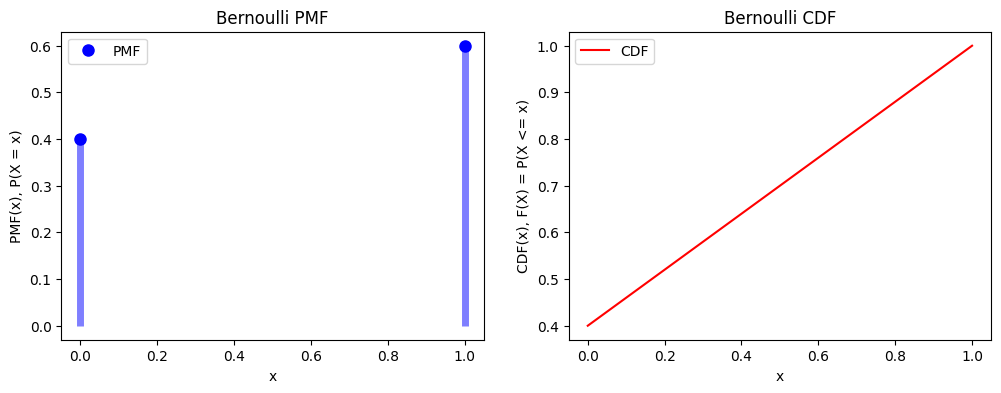

#---------------------------------------------#
Expected Value: 0.6000
Variance: 0.2400
#---------------------------------------------#
P(X = 0) = 0.4000
P(X > 0) = 0.6000
P(X >= 0) = 1.0000
P(X < 0) = 0.0000
P(X <= 0) = 0.4000


In [127]:
# Bernoulli Distribution
p = 0.6
get_bernoulli_prob = plot_discrete_rv(bernoulli, (p,), 'Bernoulli')
get_bernoulli_prob(0)

---
### **Binomial**
**Binomial Distribution**

**1. Name:** Binomial Distribution

**2. Key Concept:**
   * Models the number of successes in a fixed number of independent Bernoulli trials.
   * Each trial has only two outcomes (success or failure), and the probability of success remains the same for each trial.
   * Think of flipping a coin multiple times and counting the number of heads.

**3. Parameters:**
   * *n*: The number of trials.
   * *p*: The probability of success on a single trial.

**4. Domain of X:** {0, 1, 2, ..., *n*}
   *  Represents the possible number of successes in *n* trials.

**5. PMF:**
   *  $P(X = k) = {n \choose k}  p^k  (1 - p)^{(n - k)}$
   * Where ${n \choose k} = \frac{n!}{k!(n-k)!}$ is the binomial coefficient (read as "n choose k"), representing the number of ways to choose *k* successes from *n* trials.

**6. CDF:**
   * $F(x) = P(X \le x) = \sum_{k=0}^{x} {n \choose k}  p^k (1 - p)^{(n - k)}$

**7. Expected Value:**
   *  E(X) =  *np*

**8. Variance:**
   * Var(X) = *np(1 - p)*


**Example:**

Flipping a fair coin 10 times (*n* = 10, *p* = 0.5) and counting the number of heads.

*  The probability of getting exactly 5 heads:
   $P(X = 5) = {10 \choose 5} (0.5)^5 (0.5)^5 \approx 0.246$
*  The probability of getting 3 or fewer heads:
   $P(X \le 3) = \sum_{k=0}^{3} {10 \choose k} (0.5)^k  (0.5)^{(10-k)} $
---

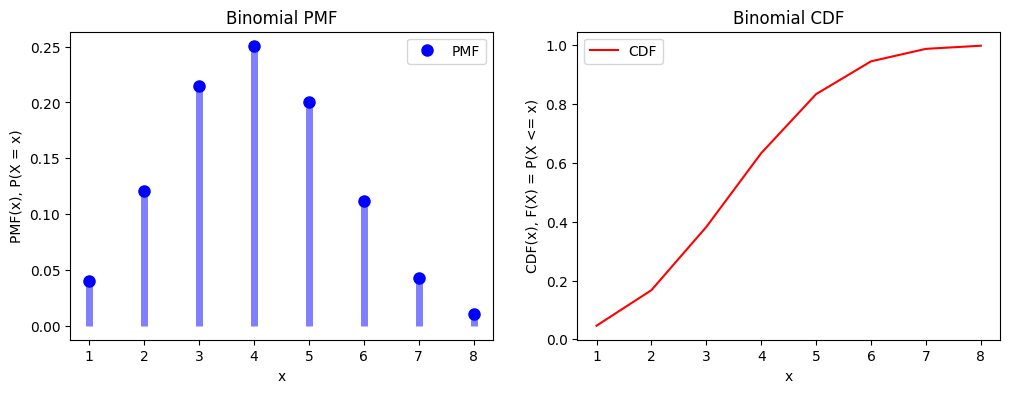

#---------------------------------------------#
Expected Value: 4.0000
Variance: 2.4000
#---------------------------------------------#
P(X = 4) = 0.2508
P(X > 4) = 0.3669
P(X >= 4) = 0.6177
P(X < 4) = 0.3823
P(X <= 4) = 0.6331


In [161]:
# Binomial Distribution
n = 10
p = 0.4
get_binom_prob = plot_discrete_rv(binom, (n, p), 'Binomial')
get_binom_prob(4)

---
### **Geometric**
**Geometric Distribution**

**1. Name:** Geometric Distribution

**2. Key Concept:**
   * Models the number of trials needed to get the first success in a sequence of independent Bernoulli trials.
   * Each trial has two outcomes (success or failure), and the probability of success remains the same for each trial.
   * Think of flipping a coin until you get heads for the first time.

**3. Parameters:**
   * *p*: The probability of success on a single trial.

**4. Domain of X:** {1, 2, 3, ... }
   * Represents the trial number on which the first success occurs.

**5. PMF:**
   * $P(X = k) = (1 - p)^{(k-1)}  p$
   *  This is the probability of getting *k - 1* failures followed by a success.

**6. CDF:**
   * $F(x) = P(X \le x) = 1 - (1 - p)^{x}$

**7. Expected Value:**
   * $E(X) = \frac{1}{p}$

**8. Variance:**
   * $Var(X) = \frac{1-p}{p^2}$


**Example:**

Rolling a fair six-sided die until you get a 5 (*p* = 1/6).

* The probability of getting the first 5 on the 3rd roll:
   $P(X = 3) = (1 - 1/6)^{(3-1)}  (1/6) = (5/6)^2  (1/6) \approx 0.116$
* The probability of getting the first 5 within the first 5 rolls:
   $P(X \le 5) = 1 - (1 - 1/6)^{5} = 1 - (5/6)^5 \approx 0.672$
---

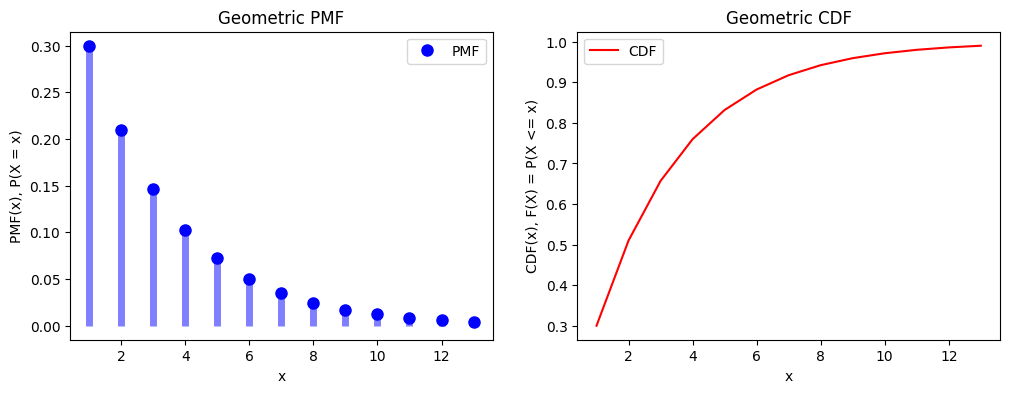

#---------------------------------------------#
Expected Value: 3.3333
Variance: 7.7778
#---------------------------------------------#
P(X = 3) = 0.1470
P(X > 3) = 0.3430
P(X >= 3) = 0.4900
P(X < 3) = 0.5100
P(X <= 3) = 0.6570


In [129]:
# Geometric Distribution
p = 0.3
get_geom_prob = plot_discrete_rv(geom, (p,), 'Geometric')
get_geom_prob(3)

---
### **Negative Binomial**
**Negative Binomial Distribution**

**1. Name:** Negative Binomial Distribution

**2. Key Concept:**
   * Models the number of trials needed to achieve a fixed number of successes in a sequence of independent Bernoulli trials.
   * Each trial has two outcomes (success or failure), and the probability of success remains the same for each trial.
   * Think of flipping a coin until you get heads a certain number of times.

**3. Parameters:**
   * *r*: The fixed number of successes.
   * *p*: The probability of success on a single trial.

**4. Domain of X:** {*r*, *r* + 1, *r* + 2, ... }
   * Represents the trial number on which the *r*th success occurs.

**5. PMF:**
   * $P(X = k) = {k-1 \choose r-1}  p^r  (1 - p)^{(k-r)}$
   *  This represents the probability of getting *r - 1* successes in the first *k - 1* trials, followed by the *r*th success on the *k*th trial.

**6. CDF:**
   *  The CDF of the negative binomial distribution doesn't have a simple closed-form expression. It can be expressed using the regularized incomplete beta function or by summing the PMF.

**7. Expected Value:**
   *  $E(X) = \frac{r}{p}$

**8. Variance:**
   *  $Var(X) = \frac{r(1-p)}{p^2}$


**Example:**

Rolling a fair six-sided die until you get three 5's (*r* = 3, *p* = 1/6).

* The probability that it takes exactly 10 rolls to get three 5's:
   $P(X = 10) = {10-1 \choose 3-1}  (1/6)^3  (5/6)^{(10-3)}  \approx 0.0465$

**Important Note:**
* There are different formulations of the negative binomial distribution. Some definitions count the number of *failures* before the *r*th success, while others (like the one above) count the total number of *trials*. Make sure to be aware of the specific definition being used in your context.
* This distribution will go to `Geometric distribution` when `r = 1`

---

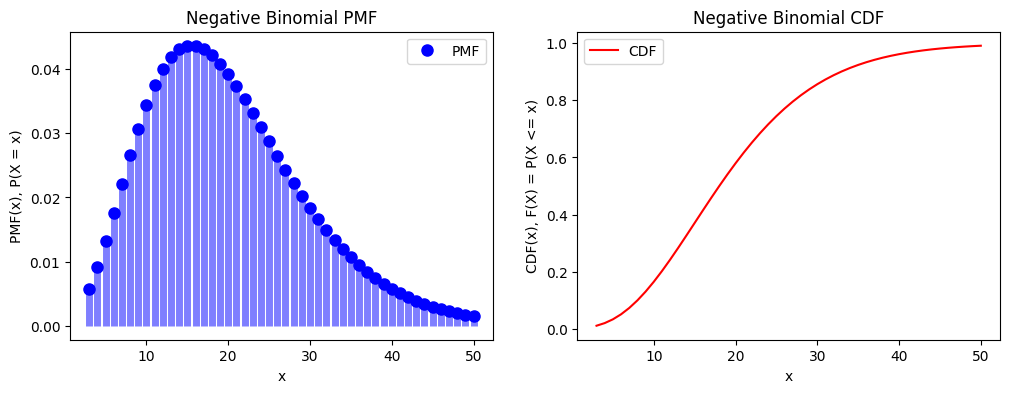

#---------------------------------------------#
Expected Value: 20.0000
Variance: 100.0000
#---------------------------------------------#
P(X = 3) = 0.0057
P(X > 3) = 0.9896
P(X >= 3) = 0.9953
P(X < 3) = 0.0047
P(X <= 3) = 0.0104


In [130]:
# Negative Binomial Distribution
r = 5
p = 0.2
get_nbinom_prob = plot_discrete_rv(nbinom, (r, p), 'Negative Binomial')
get_nbinom_prob(3)

---
### **Hypergeometric**
**Hypergeometric Distribution**

**1. Name:** Hypergeometric Distribution

**2. Key Concept:**
* Models the probability of a certain number of successes in a sample drawn *without replacement* from a finite population containing a known number of successes.
*  Think of drawing a handful of marbles from a bag containing a mix of red and blue marbles, where you don't put the marbles back in after drawing them.

**3. Parameters:**
* *N*: The total population size.
* *K*: The number of success states in the population.
* *n*: The number of draws (sample size).

**4. Domain of X:** {max(0, *n* + *K* - *N*), ..., min(*n*, *K*)}
* Represents the possible number of successes in the sample. The domain is constrained by the sample size and the number of successes in the population.

**5. PMF:**
* $P(X = k) = \frac{{K \choose k} {N - K \choose n - k}}{{N \choose n}}$
* Where ${a \choose b}$ is the binomial coefficient (read as "a choose b").

**6. CDF:**
*  The CDF of the hypergeometric distribution doesn't have a simple closed-form expression. It can be found by summing the PMF.

**7. Expected Value:**
   *  $E(X) = n \cdot \frac{K}{N}$

**8. Variance:**
   *  $Var(X) = n \cdot \frac{K}{N} \cdot \frac{N-K}{N} \cdot \frac{N-n}{N-1}$


**Example:**

A bag contains 10 marbles, 6 of which are red and 4 are blue. You draw 5 marbles from the bag without replacement (*N* = 10, *K* = 6, *n* = 5).

* The probability of drawing exactly 3 red marbles:
   $P(X = 3) = \frac{{6 \choose 3} {4 \choose 2}}{{10 \choose 5}} = \frac{20 \cdot 6}{252} \approx 0.476$


**Key Difference from Binomial:**

The hypergeometric distribution is used for sampling *without* replacement, whereas the binomial distribution is used for sampling *with* replacement. In the hypergeometric case, the probability of success changes with each draw because the composition of the population changes.

---

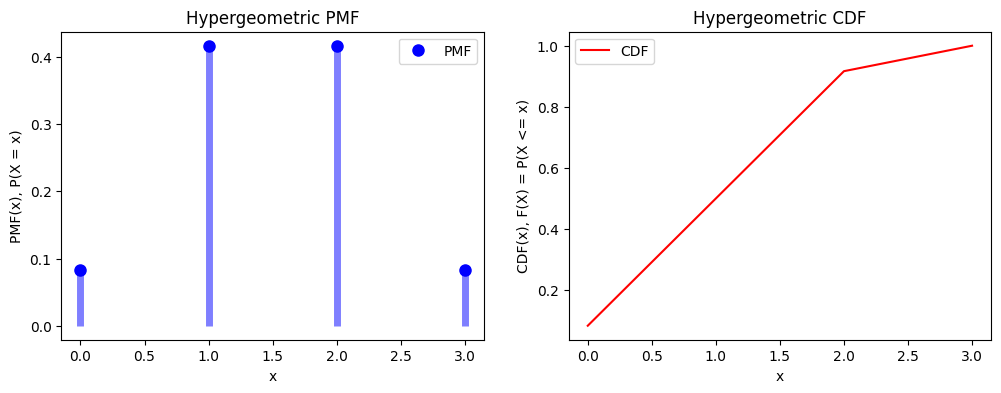

#---------------------------------------------#
Expected Value: 1.5000
Variance: 0.5833
#---------------------------------------------#
P(X = 2) = 0.4167
P(X > 2) = 0.0833
P(X >= 2) = 0.5000
P(X < 2) = 0.5000
P(X <= 2) = 0.9167


In [168]:
# Hypergeometric Distribution
N = 10
K = 5
n = 3
get_hypergeom_prob = plot_discrete_rv(hypergeom, (N,K,n), 'Hypergeometric')
get_hypergeom_prob(2)

#### Hypergeometric Approximation to Binomial

**Hypergeometric Approximation to Binomial**

If  $N$ (population size) $\gg n$ (sample size), then the hypergeometric distribution with parameters $N$, $K$, and $n$ can be approximated by the binomial distribution with parameters $n$ and $p = \frac{K}{N}$.

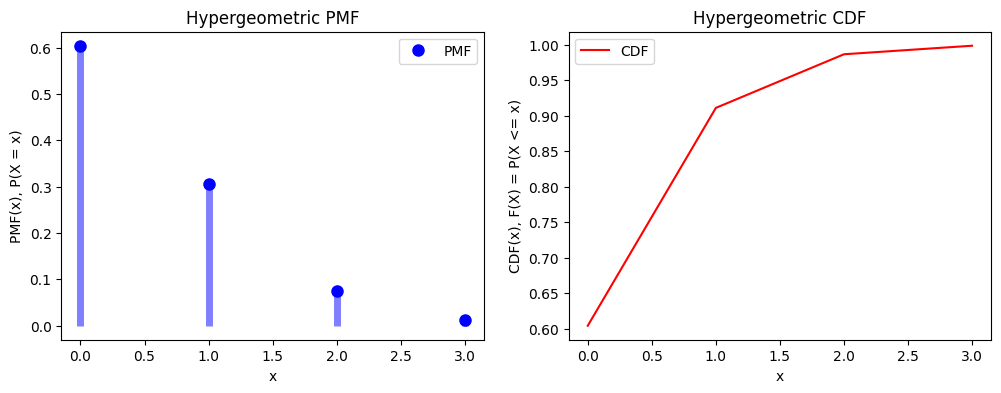

#---------------------------------------------#
Expected Value: 0.5000
Variance: 0.4926
#---------------------------------------------#


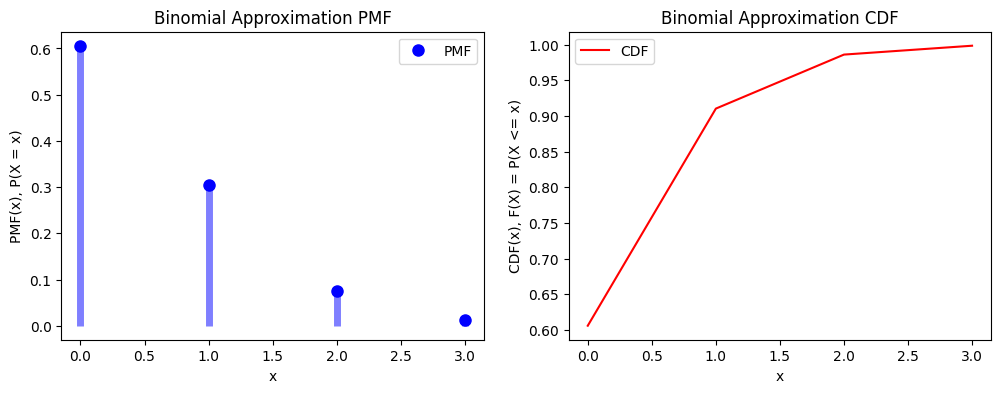

#---------------------------------------------#
Expected Value: 0.5000
Variance: 0.4975
#---------------------------------------------#

Hypergeometric Distribution:
P(X = 2) = 0.0755
P(X > 2) = 0.0135
P(X >= 2) = 0.0890
P(X < 2) = 0.9110
P(X <= 2) = 0.9865

Binomial Approximation:
P(X = 2) = 0.0757
P(X > 2) = 0.0141
P(X >= 2) = 0.0898
P(X < 2) = 0.9102
P(X <= 2) = 0.9859


In [170]:
# Hypergeometric Distribution Parameters
N = 10000  # Total population size
K = 50   # Number of success states in the population
n = 100    # Number of draws (sample size)

# Calculate Hypergeometric probabilities
get_hypergeom_prob = plot_discrete_rv(hypergeom, (N, K, n), 'Hypergeometric')

# Binomial Approximation
# Use the same sample size (n) and calculate p = K/N
p = K / N
get_binom_prob = plot_discrete_rv(binom, (n, p), 'Binomial Approximation')

# Example: Calculate probability of getting 2 successes
# Using Hypergeometric distribution
print("\nHypergeometric Distribution:")
get_hypergeom_prob(2)

# Using Binomial approximation
print("\nBinomial Approximation:")
get_binom_prob(2)

---
### **Poisson**
**Poisson Distribution**

**1. Name:** Poisson Distribution

**2. Key Concept:**

*   Models the probability of a given number of events occurring in a fixed interval of time or space if these events occur with a known average rate and independently of the time since the last event.

* Think of the number of customers arriving at a store in an hour, or the number of typos on a page of a book.

**3. Parameters:**
*  λ (lambda): The average rate of events occurring in the given interval.

**4. Domain of X:** {0, 1, 2, 3, ... }
      Represents the possible number of events that occur in the given interval.

**5. PMF:**
* $P(X = k) = \frac{e^{-λ}  λ^k}{k!}$
* Where *e* is the base of the natural logarithm (approximately 2.71828).

**6. CDF:**
     The CDF of the Poisson distribution doesn't have a simple closed-form expression. It can be found by summing the PMF.

**7. Expected Value:**
  * $E(X) = λ$

**8. Variance:**
  * $Var(X) = λ $


**Example:**

A call center receives an average of 5 calls per hour (λ = 5).

* The probability of receiving exactly 3 calls in an hour:
   $P(X = 3) = \frac{e^{-5}  5^3}{3!} \approx 0.140$


**Important Properties:**

* **Memorylessness:** The Poisson process has the memoryless property, meaning that the future occurrences of events don't depend on how many events have happened in the past.
* **Relationship to the Exponential Distribution:** The time *between* events in a Poisson process follows an exponential distribution.
---

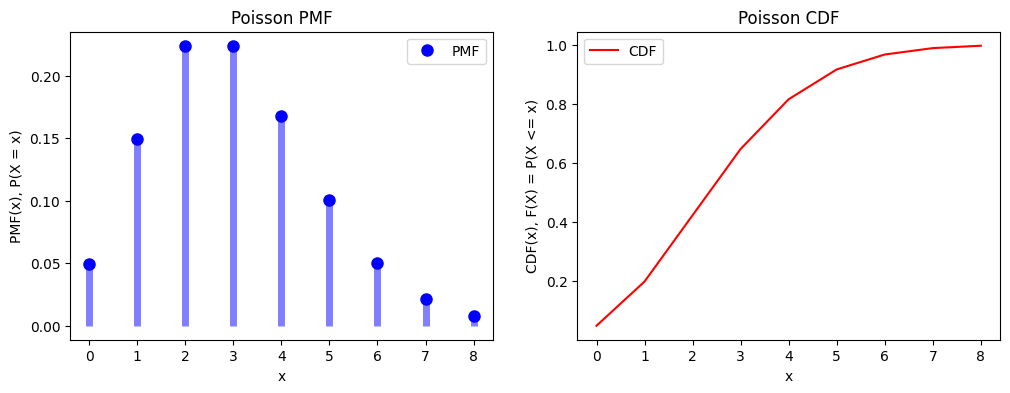

#---------------------------------------------#
Expected Value: 3.0000
Variance: 3.0000
#---------------------------------------------#
P(X = 2) = 0.2240
P(X > 2) = 0.5768
P(X >= 2) = 0.8009
P(X < 2) = 0.1991
P(X <= 2) = 0.4232


In [132]:
# Poisson Distribution
mu = 3
get_poisson_prob = plot_discrete_rv(poisson, (mu,), 'Poisson')
get_poisson_prob(2)

#### Poisson Approximation to Binomial

**Poisson Approximation to Binomial**

The Poisson distribution can be used to approximate the binomial distribution when the following conditions are met:

* **Large number of trials (*n*)**
* **Small probability of success (*p*)**
* **The product *n* \* *p* is moderate (usually less than 10)**

**Why does this work?**

When *n* is large and *p* is small, the binomial probabilities can become difficult to calculate directly. The Poisson distribution provides a good approximation in this scenario, especially when events are rare.

**How to use the approximation:**

1. **Calculate the mean of the binomial distribution:**
   * Mean ($\lambda$) = $n \cdot p$

2. **Use the Poisson distribution with the same mean ($\lambda$) to approximate the binomial probabilities.**

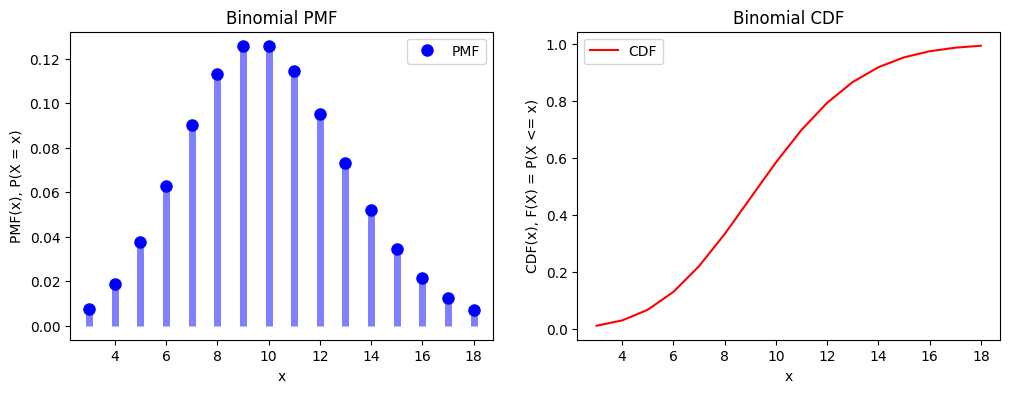

#---------------------------------------------#
Expected Value: 10.0000
Variance: 9.9000
#---------------------------------------------#


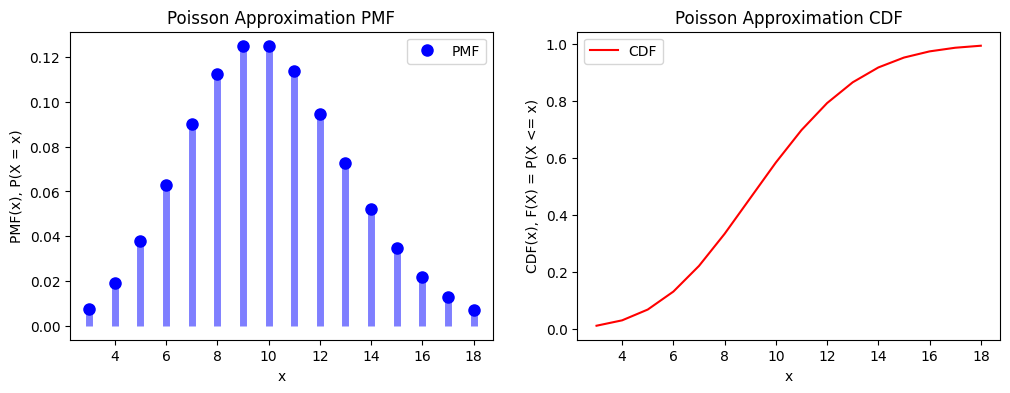

#---------------------------------------------#
Expected Value: 10.0000
Variance: 10.0000
#---------------------------------------------#


In [148]:
# Poisson Approximation to Binomial
n = 1000
p = 0.01
x_range_poisson = (0, 20)  # Define x_range for Poisson

# Plot Binomial using plot_discrete_rv
get_binom_prob = plot_discrete_rv(binom, (n, p), 'Binomial')

# Plot Poisson approximation using plot_discrete_rv
lam = n * p
get_poisson_prob = plot_discrete_rv(poisson, (lam,), 'Poisson Approximation')

---
## **Continuous Random Variable**

### Function to plot

This function is designed to visualize and analyze continuous random variables. It takes the following arguments:

*   **`rv`**: The SciPy stats random variable object (e.g., `norm`, `expon`, `uniform`).
*   **`params`**: A tuple containing the parameters of the distribution (e.g., `(loc, scale)` for Uniform, `(mu, sigma)` for Normal).
*   **`title`**: A string representing the title of the plots.
*   **`x_range`**: A tuple specifying the range of x-values for plotting (e.g., `(0, 10)`).

**Functionality:**

1.  **Calculates PDF and CDF:** It computes the probability density function (PDF) and cumulative distribution function (CDF) for a range of values within the specified `x_range`.
2.  **Plots PDF and CDF:** Creates two subplots, one for the PDF and another for the CDF. PDF is displayed as a blue line (-), and CDF is displayed as a red line (r-).
3.  **Calculates and Prints Statistics:** Calculates the expected value and variance of the distribution and prints them to the console.
4.  **Returns a Probability Function:** Returns a function called `get_probability` that you can use to calculate probabilities for specific values of the random variable (f(x = x), P(X > x), P(X >= x), P(X < x), P(X <= x)).


In [133]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import uniform, expon, norm, zscore, t, chi2, f, erlang, gamma, beta, lognorm, logistic

# Function to plot PDF and CDF, return probability, and calculate statistics
def plot_continuous_rv(rv, params, title, x_range):
    x = np.linspace(x_range[0], x_range[1], 1000)
    pdf = rv.pdf(x, *params)
    cdf = rv.cdf(x, *params)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    ax1.plot(x, pdf, '-', ms=8, label='PDF')
    ax1.set_title(f'{title} PDF')
    ax1.set_xlabel('x')
    ax1.set_ylabel('PDF(x), f(x)')
    ax1.legend()

    ax2.plot(x, cdf, 'r-', label='CDF')
    ax2.set_title(f'{title} CDF')
    ax2.set_xlabel('x')
    ax2.set_ylabel('CDF(x), F(X) = P(X <= x)')
    ax2.legend()

    plt.show()

    expected_value = rv.mean(*params)
    variance = rv.var(*params)
    print("#---------------------------------------------#")
    print(f"Expected Value: {expected_value:.4f}")
    print(f"Variance: {variance:.4f}")
    print("#---------------------------------------------#")

    def get_probability(x_val):
        px = rv.pdf(x_val, *params)
        pgt = rv.sf(x_val, *params)
        pge = rv.sf(x_val, *params) + rv.pdf(x_val, *params)
        plt = rv.cdf(x_val, *params)
        ple = rv.cdf(x_val, *params)

        print(f"f(x = {x_val}) = {px:.4f}")
        print(f"P(X > {x_val}) = {pgt:.4f}")
        print(f"P(X >= {x_val}) = {pge:.4f}")
        print(f"P(X < {x_val}) = {plt:.4f}")
        print(f"P(X <= {x_val}) = {ple:.4f}")

    return get_probability

---
### **Uniform**

**Uniform Distribution (Continuous)**

**1. Name:** Uniform Distribution (Continuous)

**2. Key Concept:**
  * Represents a continuous random variable where all values within a given range are equally likely to occur.
  * Think of a random number generator that produces numbers between 0 and 1 with equal probability.

**3. Parameters:**
  * *a*: The lower bound of the interval.
  * *b*: The upper bound of the interval.

**4. Domain of X:** [*a*, *b*]
  *  X can take any value within the interval from *a* to *b*.

**5. PDF:**
   * $f(x) = \begin{cases}
      \frac{1}{b-a} & \text{for } a \le x \le b \\
      {0} & \text{otherwise}
      \end{cases}$

**6. CDF:**
   * $F(x) = \begin{cases}
      0 & \text{for } x < a \\
      \frac{x-a}{b-a} & \text{for } a \le x \le b \\
      1 & \text{for } x > b
      \end{cases}$

**7. Expected Value:**
   *  $E(X) = \frac{a + b}{2}$

**8. Variance:**
   *  $Var(X) = \frac{(b - a)^2}{12}$


**Example:**

A machine produces random numbers between 2 and 5 (*a* = 2, *b* = 5).

* The probability density function is constant between 2 and 5: $f(x) = \frac{1}{5-2} = \frac{1}{3}$ for 2 ≤ *x* ≤ 5.
* The probability of generating a number between 3 and 4:
   $P(3 \le X \le 4) = \int_{3}^{4} \frac{1}{3} \, dx = \frac{1}{3}$
---

Uniform Distribution: loc = 0, scale = 1


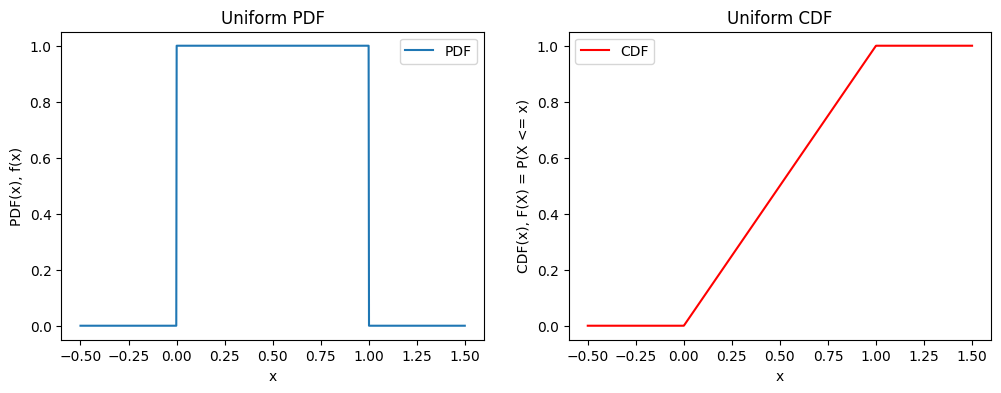

#---------------------------------------------#
Expected Value: 0.5000
Variance: 0.0833
#---------------------------------------------#
f(x = 0.5) = 1.0000
P(X > 0.5) = 0.5000
P(X >= 0.5) = 1.5000
P(X < 0.5) = 0.5000
P(X <= 0.5) = 0.5000


In [134]:
# Uniform Distribution
loc = 0
scale = 1
print(f"Uniform Distribution: loc = {loc}, scale = {scale}")
get_uniform_prob = plot_continuous_rv(uniform, (loc, scale), 'Uniform', (loc - 0.5, loc + scale + 0.5))
get_uniform_prob(0.5)

---
### **Exponential**
**Exponential Distribution**

**1. Name:** Exponential Distribution

**2. Key Concept:**
   * Models the time between events in a Poisson process (where events occur continuously and independently at a constant average rate).
   * Often used to model the lifetime of devices or the time until a specific event occurs.
   * Think of the time until a light bulb burns out, or the time until you receive the next phone call.

**3. Parameters:**
   * λ (lambda): The rate parameter (average number of events per unit of time).
       * Alternatively, you can use the mean (μ), which is equal to 1/λ.

**4. Domain of X:** [0, ∞)
   *  X represents time, so it can take on any non-negative value.

**5. PDF:**
   * $f(x; λ) = \begin{cases}
      λe^{-λx} & \text{for } x \ge 0 \\
      0 & \text{for } x < 0
      \end{cases}$

**6. CDF:**
   * $F(x) = \begin{cases}
      1 - e^{-λx} & \text{for } x \ge 0 \\
      0 & \text{for } x < 0
      \end{cases}$

**7. Expected Value:**
   *  $E(X) = \frac{1}{\lambda} = \mu$

**8. Variance:**
   *  $Var(X) = \frac{1}{\lambda^2} = \mu^2$


**Example:**

The average time between customer arrivals at a bank is 5 minutes (λ = 1/5 = 0.2 customers per minute).

* The probability density function is $f(x) = 0.2e^{-0.2x}$ for *x* ≥ 0.
* The probability that a customer arrives within the next 2 minutes:
   $P(X \le 2) = F(2) = 1 - e^{-0.2 \cdot 2} \approx 0.33$


**Important Property:**

* **Memorylessness:** Like the Poisson process, the exponential distribution has the memoryless property. This means that the probability of an event happening in the future is independent of how much time has already elapsed.
---


Exponential Distribution: lambda = 1 (scale = 1/lambda = 1.0)


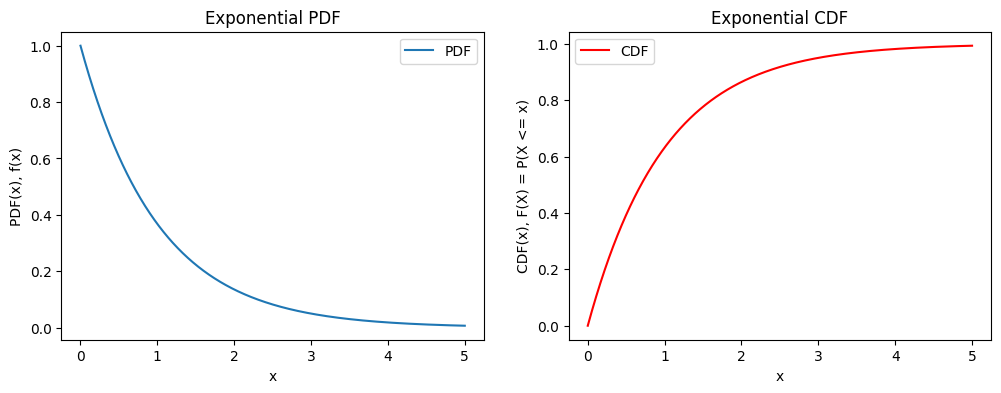

#---------------------------------------------#
Expected Value: 1.0000
Variance: 1.0000
#---------------------------------------------#
f(x = 1) = 0.3679
P(X > 1) = 0.3679
P(X >= 1) = 0.7358
P(X < 1) = 0.6321
P(X <= 1) = 0.6321


In [135]:
# Exponential Distribution
lam = 1
print(f"Exponential Distribution: lambda = {lam} (scale = 1/lambda = {1/lam})")
get_expon_prob = plot_continuous_rv(expon, (0, 1/lam), 'Exponential', (0, 5/lam))
get_expon_prob(1)

---
### **Normal**

**Normal Distribution**

**1. Name:** Normal Distribution (also known as Gaussian Distribution)

**2. Key Concept:**
* One of the most important and widely used distributions in statistics.
* Models many natural phenomena, such as heights, weights, IQ scores, and measurement errors.
* Characterized by its bell-shaped curve, which is symmetric around the mean.

**3. Parameters:**
*  μ (mu): The mean (average) of the distribution.
*  σ (sigma): The standard deviation, which measures the spread or variability of the distribution.

**4. Domain of X:** (-∞, ∞)
   * X can take on any real value.

**5. PDF:**

  * $f(x; \mu, \sigma) = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{1}{2} (\frac{x - \mu}{\sigma})^2}$

**6. CDF:**
   * The CDF of the normal distribution doesn't have a simple closed-form expression. It's often represented by the symbol $\Phi(x)$ and is calculated using numerical methods or tables.

**7. Expected Value:**
   * $E(X) =  μ$

**8. Variance:**
   * $Var(X) = σ²$


**Example:**

The heights of adult males in a certain population are normally distributed with a mean of 175 cm (μ = 175) and a standard deviation of 7 cm (σ = 7).

* The probability density function is given by the formula above.
* To find the probability of a randomly selected male having a height between 170 cm and 180 cm, you would calculate the area under the curve between those two values. This is often done using a standard normal table or software.


**Important Properties:**

* **Symmetry:** The normal distribution is symmetric about its mean.
* **Empirical Rule:**  Approximately 68% of the data falls within one standard deviation of the mean, 95% within two standard deviations, and 99.7% within three standard deviations.
* **Central Limit Theorem:** The sum of a large number of independent random variables, regardless of their individual distributions, tends to follow a normal distribution. This makes the normal distribution crucial in many statistical applications.
---


Normal Distribution: mu = 100, sigma = 1.5


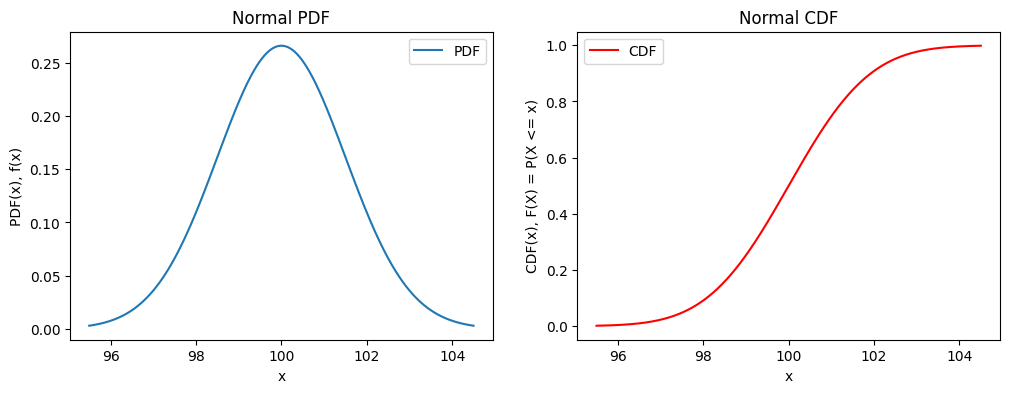

#---------------------------------------------#
Expected Value: 100.0000
Variance: 2.2500
#---------------------------------------------#
f(x = 1) = 0.0000
P(X > 1) = 1.0000
P(X >= 1) = 1.0000
P(X < 1) = 0.0000
P(X <= 1) = 0.0000


In [152]:
# Normal Distribution
mu = 100
sigma = 1.5
print(f"Normal Distribution: mu = {mu}, sigma = {sigma}")
get_norm_prob = plot_continuous_rv(norm, (mu, sigma), 'Normal', (mu - 3*sigma, mu + 3*sigma))
get_norm_prob(1)

#### Binomial Approximation to Normal

**Approximations of Probability Distributions**

Here are the conditions when these approximations generally hold:

**1. Binomial Approximation to Normal Distribution**

The binomial distribution can be approximated by the normal distribution when the following conditions are met:

* **Large sample size:** The number of trials (*n*) is large.
* **Moderate probability of success:** The probability of success (*p*) is not too close to 0 or 1.

A commonly used rule of thumb is that both  `n * p >= 5` and `n * (1 - p) >= 5` should hold.

**Why does this work?**

The Central Limit Theorem states that the sum of a large number of independent random variables tends towards a normal distribution, regardless of the original distribution of those variables. In the case of the binomial distribution, each trial is like a Bernoulli random variable (with values 0 or 1). When you have many trials, the total number of successes can be thought of as the sum of these Bernoulli variables.

**How to use the approximation:**

1. **Calculate the mean and variance of the binomial distribution:**
   * Mean ($\mu$) = $n \cdot p$
   * Variance ($\sigma^2$) = $n \cdot p \cdot (1 - p)$

2. **Use the corresponding normal distribution with the same mean and variance to approximate probabilities.**
   * You'll often need to use a continuity correction to improve the accuracy of the approximation. This involves adjusting the boundaries of the interval you're interested in by 0.5.




Binomial n = 1000, p = 0.5


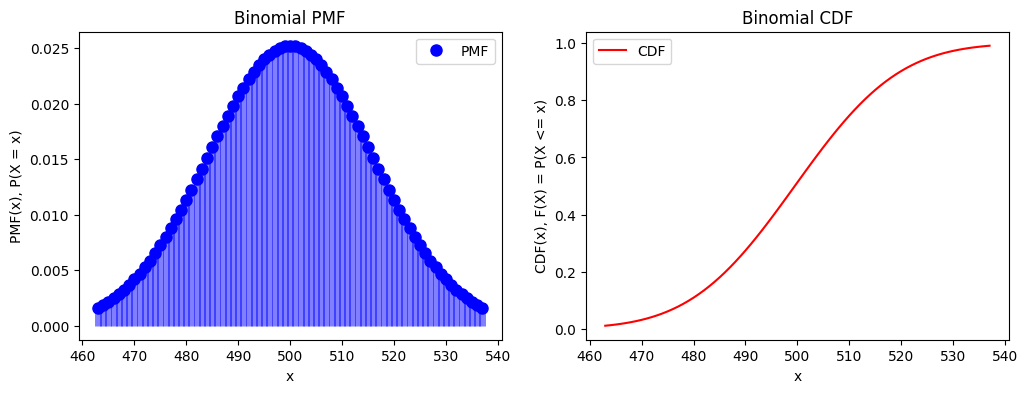

#---------------------------------------------#
Expected Value: 500.0000
Variance: 250.0000
#---------------------------------------------#

Normal mu = 500.0, sigma = 15.811388300841896


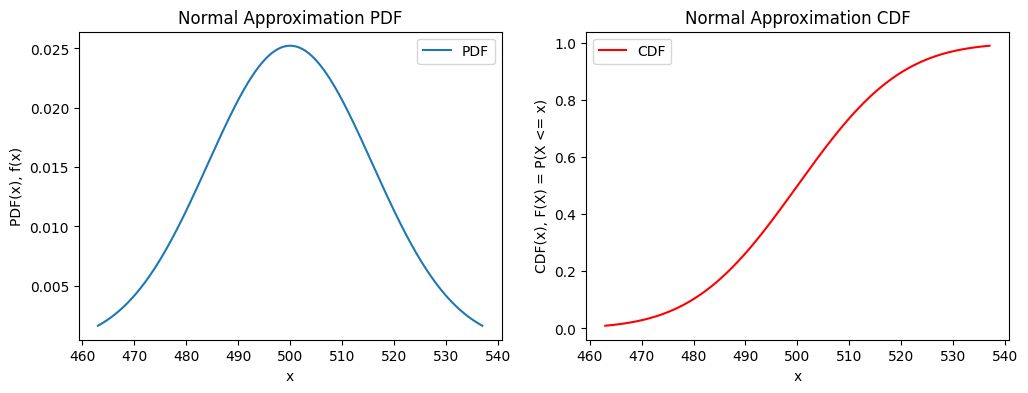

#---------------------------------------------#
Expected Value: 500.0000
Variance: 250.0000
#---------------------------------------------#


In [164]:
# Binomial Approximation to Normal
n = 1000
p = 0.5

# Plot Binomial using plot_discrete_rv
print(f'Binomial n = {n}, p = {p}')
get_binom_prob = plot_discrete_rv(binom, (n, p), 'Binomial')

# Get the range of x-values for the Binomial distribution
x_binom = np.arange(binom.ppf(0.01, n, p), binom.ppf(0.99, n, p) + 1)

# Plot Normal approximation using plot_continuous_rv with the Binomial's range
mu = n * p
sigma = np.sqrt(n * p * (1 - p))
print(f'\nNormal mu = {mu}, sigma = {sigma}')
get_norm_prob = plot_continuous_rv(norm, (mu, sigma), 'Normal Approximation', (x_binom.min(), x_binom.max()))

---
### **Standard Normal**
**Standard Normal Distribution**

**1. Name:** Standard Normal Distribution

**2. Key Concept:**
* A special case of the normal distribution where the mean ($\mu$) is 0 and the standard deviation ($\sigma$) is 1.
* It's a standardized form of the normal distribution, making it easier to compare and analyze different normal distributions.
* Often denoted by the letter Z.

**3. Parameters:**
 *  $\mu = 0$
 *  $\sigma = 1$

**4. Domain of Z:** $(-\infty, \infty)$
   * Z can take on any real value.

**5. PDF:**
  * $f(z) = \frac{1}{\sqrt{2\pi}} e^{-\frac{1}{2} z^2}$

**6. CDF:**
   *  Represented by $\Phi(z)$.  Values of $\Phi(z)$ are usually found in standard normal distribution tables or calculated using software.

**7. Expected Value:**
  * $E(Z) = μ = 0$

**8. Variance:**
  * $Var(Z) = σ² = 1$


**Relationship to the Normal Distribution:**

Any normal distribution with mean $\mu$ and standard deviation $\sigma$ can be transformed to the standard normal distribution using the following **z-score formula**:

  $z = \frac{x - \mu}{\sigma}$

where:

*  *x* is a value from the original normal distribution.
*  *z* is the corresponding z-score in the standard normal distribution.


**Why is it Important?**

* **Standardization:**  Allows you to compare values from different normal distributions on a common scale.
* **Probability Calculations:**  Standard normal distribution tables and software functions make it easy to calculate probabilities associated with any normal distribution once it's converted to the standard normal distribution.


**Example:**

If you have a normal distribution with $\mu = 50$ and $\sigma = 10$, and you want to find the probability of $X$ being less than 60, you would:

1. **Calculate the z-score:**  $z = \frac{60 - 50}{10} = 1$
2. **Look up the probability in a standard normal table or use software:** $\Phi(1) \approx 0.8413$

This means that the probability of $X$ being less than 60 in the original normal distribution is approximately 0.8413.

---

Z Distribution: mu = 0, sigma = 1 (Standard Normal)


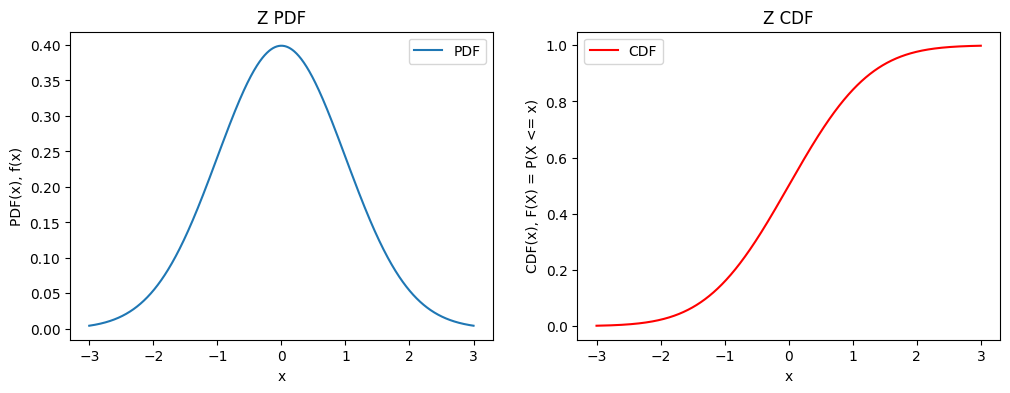

#---------------------------------------------#
Expected Value: 0.0000
Variance: 1.0000
#---------------------------------------------#
f(x = 1.96) = 0.0584
P(X > 1.96) = 0.0250
P(X >= 1.96) = 0.0834
P(X < 1.96) = 0.9750
P(X <= 1.96) = 0.9750


In [137]:
# Z Distribution (Standard Normal)
print("Z Distribution: mu = 0, sigma = 1 (Standard Normal)")
get_z_prob = plot_continuous_rv(norm, (0, 1), 'Z', (-3, 3)) # Same as Normal with mu=0, sigma=1
get_z_prob(1.96)

---
### Chi-square
**Chi-Square Distribution**

**1. Name:** Chi-Square Distribution ($\chi^2$ distribution)

**2. Key Concept:**
  * The chi-square distribution is a statistical tool used to analyze categorical data. It is particularly useful for conducting hypothesis tests on the independence of two categorical variables and for assessing goodness-of-fit, which determines whether observed data matches a theoretical distribution.
  * This continuous distribution arises from the sum of the squares of independent standard normal random variables.
  * Chi-square values are always non-negative.

**3. Parameters:**
   *  $df$: Degrees of freedom, which influences the shape of the distribution.

**4. Domain of X:** $[0, \infty)$
  * The random variable X, representing the chi-square value, can take any non-negative value.

**5. PDF:**

 * $f(x; k) = \frac{1}{2^{df/2} \Gamma(k/2)} x^{df/2 - 1} e^{-x/2}$ for $x \ge 0$

where
* $df$ is the degrees of freedom.
* $\Gamma(df/2)$ is the gamma function evaluated at $df/2$. The gamma function is a generalization of the factorial function to complex and real numbers.


**6. CDF:**
  *  Similar to the normal distribution, the cumulative distribution function (CDF) of the chi-square distribution does not have a simple, closed-form expression. Its values are usually obtained from statistical tables or software.

**7. Expected Value:**
  *  $E(X) = df$

**8. Variance:**
  * $Var(X) = 2 \cdot df$

**Example Applications:**

* **Test of Independence:** The chi-square test of independence determines whether there is a statistically significant association between two categorical variables. For example, it could be used to investigate if there's a relationship between a person's gender and their preferred type of movie genre.
* **Goodness-of-Fit Test:** The chi-square goodness-of-fit test assesses how well the observed data fits a theoretical distribution. For instance, it could be used to test whether a six-sided die is fair by comparing the observed frequencies of each face to the expected frequency of 1/6.
---

#### **Special Function**
**Beta Function**

The Beta function is usually denoted by the capital Greek letter Beta (Β) and is defined as:

  $B(x, y) = \int_{0}^{1} t^{x-1}(1-t)^{y-1} \, dt $

where *x* and *y* are complex numbers with positive real parts.

**Gamma Function**

The Gamma function is denoted by the capital Greek letter Gamma (Γ) and is defined as:

  $\Gamma(z) = \int_{0}^{\infty} t^{z-1}e^{-t} \, dt $

where *z* is a complex number with a positive real part.

**Relationship between Beta and Gamma Functions**

The Beta function can be expressed in terms of the Gamma function:

  $B(x, y) = \frac{\Gamma(x) \Gamma(y)}{\Gamma(x+y)}$

This relationship is often useful for calculations and understanding the properties of these functions.

---

Chi-square Distribution: df = 5


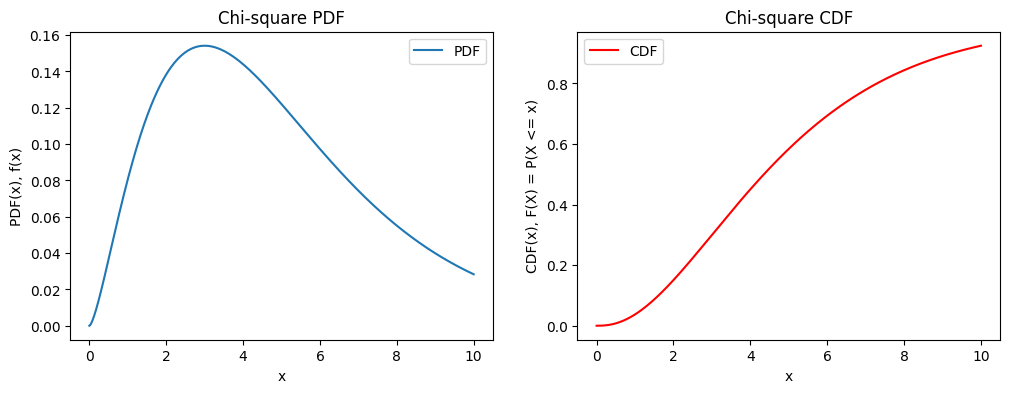

#---------------------------------------------#
Expected Value: 5.0000
Variance: 10.0000
#---------------------------------------------#
f(x = 5) = 0.1220
P(X > 5) = 0.4159
P(X >= 5) = 0.5379
P(X < 5) = 0.5841
P(X <= 5) = 0.5841


In [139]:
# Chi-square Distribution
df = 5
print(f"Chi-square Distribution: df = {df}")
get_chi2_prob = plot_continuous_rv(chi2, (df,), 'Chi-square', (0, 2*df))
get_chi2_prob(5)

---
### **Student's T**
**Student's t-Distribution**

**1. Name:** Student's t-Distribution (or simply the t-Distribution)

**2. Key Concept:**
  * Similar in shape to the normal distribution (bell-shaped and symmetric), but with heavier tails.
  * Used when you have a small sample size and the population standard deviation is unknown.
  * Often used in hypothesis testing and confidence intervals for population means.

**3. Parameters:**
   * $df$: Degrees of freedom. This is related to the sample size (usually, degrees of freedom = sample size - 1).

**4. Domain of T:** $(-\infty, \infty)$
   * T can take on any real value.

**5. PDF:**
  * $ f(t; \nu) = \frac{\Gamma(\frac{\nu+1}{2})}{\sqrt{\nu\pi} , \Gamma(\frac{\nu}{2})} \left( 1 + \frac{t^2}{\nu} \right)^{-\frac{\nu+1}{2}} $

**6. CDF:**
   *  Like the normal distribution, the CDF of the t-distribution doesn't have a simple closed form. It's usually obtained from tables or software.

**7. Expected Value:**
   *  $E(T) = 0$ (for $df > 1$)

**8. Variance:**
   *  $Var(T) = \frac{df}{df - 2}$  (for $df > 2$)


**Relationship to the Normal Distribution:**

* As the degrees of freedom ($\nu$) increase, the t-distribution approaches the standard normal distribution.
* When $\nu$ is large (generally considered 30 or more), the t-distribution is very close to the normal distribution.


**Why is it Important?**

* **Small Sample Sizes:** When you have a small sample size, the sample standard deviation is not a very reliable estimate of the population standard deviation. The t-distribution accounts for this extra uncertainty.
* **Hypothesis Testing:**  The t-distribution is used in t-tests to test hypotheses about population means when the population standard deviation is unknown.
* **Confidence Intervals:** It's also used to construct confidence intervals for population means.


**Example:**

If you're estimating the average height of a population based on a small sample (say, 10 people), you would use the t-distribution to construct a confidence interval for the population mean height. The degrees of freedom would be 9 (10 - 1).

---

T Distribution: df = 10


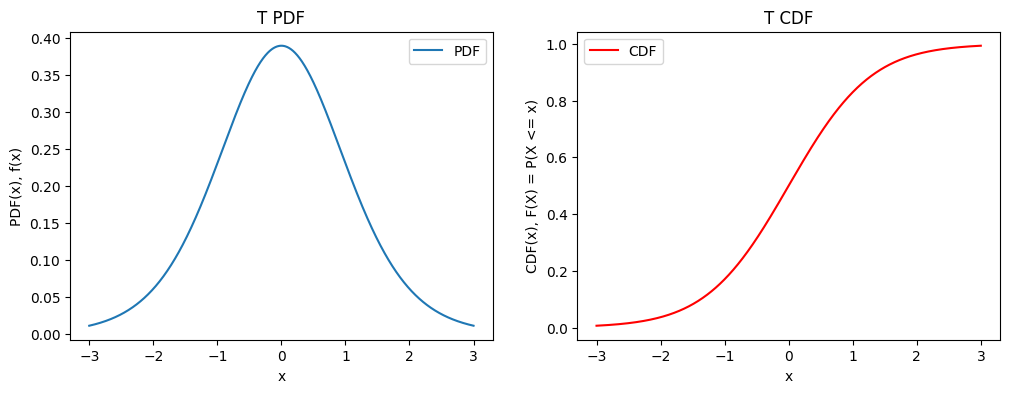

#---------------------------------------------#
Expected Value: 0.0000
Variance: 1.2500
#---------------------------------------------#
f(x = 1) = 0.2304
P(X > 1) = 0.1704
P(X >= 1) = 0.4008
P(X < 1) = 0.8296
P(X <= 1) = 0.8296


In [138]:
# T Distribution
df = 10
print(f"T Distribution: df = {df}")
get_t_prob = plot_continuous_rv(t, (df,), 'T', (-3, 3))
get_t_prob(1)

---
### **F (Fisher-Snedecor)**

**F-Distribution**

**1. Name:** F-Distribution (also known as Fisher-Snedecor distribution)

**2. Key Concept:**
  * The F-distribution is a continuous probability distribution that arises in the context of analysis of variance (ANOVA) and regression analysis.
   * It is used to test the equality of variances between two or more populations.
  * The F-distribution is defined by two parameters, representing the degrees of freedom associated with the numerator and denominator of an F-statistic.
  * F-values are always non-negative.

**3. Parameters:**
  *  $df_1$: Degrees of freedom for the numerator.
  *  $df_2$: Degrees of freedom for the denominator.

**4. Domain of X:** $[0, \infty)$
   * The random variable X, representing the F-value, can take any non-negative value.

**5. PDF:**

  * $f(x; df_1, df_2) = \frac{\sqrt{\frac{(df_1x)^{df_1} \cdot df_2^{df_2}}{(df_1x + df_2)^{df_1 + df_2}}}}{x \cdot B(\frac{df_1}{2}, \frac{df_2}{2})}$

    * where: $B(\frac{df_1}{2}, \frac{df_2}{2})$ is the beta function.

**6. CDF:**
  * The cumulative distribution function (CDF) of the F-distribution, like many other distributions, does not have a simple closed form. Its values are typically obtained from statistical tables or software.

**7. Expected Value:**
   * $E(X) = \frac{df_2}{df_2 - 2}$  (for $df_2 > 2$)

**8. Variance:**
   * $Var(X) = \frac{2df_2^2 (df_1 + df_2 -2)}{df_1 (df_2 - 2)^2 (df_2 - 4)}$ (for $df_2 > 4$)

**Example Applications:**

* **ANOVA:** In ANOVA, the F-test is used to compare the variances between groups to determine if there are statistically significant differences in means. For example, you might use ANOVA to test if there's a difference in average test scores among students who used different study methods.
* **Regression Analysis:** In regression analysis, the F-test can assess the overall significance of the model, determining if the predictor variables collectively explain a significant portion of the variance in the response variable.
---

F Distribution: dfn = 5, dfd = 10


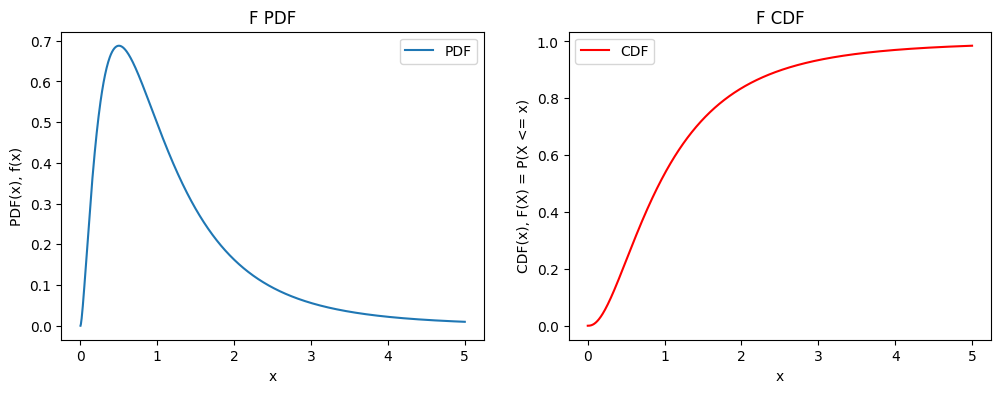

#---------------------------------------------#
Expected Value: 1.2500
Variance: 1.3542
#---------------------------------------------#
f(x = 2) = 0.1620
P(X > 2) = 0.1642
P(X >= 2) = 0.3262
P(X < 2) = 0.8358
P(X <= 2) = 0.8358


In [140]:
# F Distribution
dfn = 5
dfd = 10
print(f"F Distribution: dfn = {dfn}, dfd = {dfd}")
get_f_prob = plot_continuous_rv(f, (dfn, dfd), 'F', (0, 5))
get_f_prob(2)

---
#### **The relation of F vs. Chi-square**



Note:

$F = \frac{\chi^2_1 / df_1}{\chi^2_2 / df_2}$

This formula represents how to calculate an F-statistic, which is often used in statistical tests like ANOVA and regression analysis.

**Here's what the symbols represent:**

*  $F$: The F-statistic.
* $\chi^2_1$: The chi-square statistic for the first sample or group.
* $df_1$: The degrees of freedom for the first chi-square statistic.
* $\chi^2_2$: The chi-square statistic for the second sample or group.
* $df_2$: The degrees of freedom for the second chi-square statistic.

Essentially, the F-statistic compares the variances of two populations (or samples) by taking the ratio of their chi-square statistics, each normalized by their degrees of freedom.

---
### **Erlang**
**Erlang Distribution**

**1. Name:** Erlang Distribution (a special case of the Gamma distribution)

**2. Key Concept:**
   * The Erlang distribution models the time it takes for a fixed number of events to occur in a Poisson process (where events happen independently at a constant average rate).
   * It can be thought of as the sum of *k* independent exponential random variables, each with the same rate parameter.
   * Commonly used in queuing theory, telecommunications, and reliability analysis.

**3. Parameters:**
   *  $k$:  A positive integer representing the shape parameter (the number of events).
   *  $\lambda$: The rate parameter (the average number of events per unit of time).

**4. Domain of X:** $[0, \infty)$
    * X represents time, so it takes non-negative values.

**5. PDF:**
   * $f(x; k, \lambda) = \frac{\lambda^k x^{k-1} e^{-\lambda x}}{(k-1)!}$  for $x \ge 0$

**6. CDF:**
   * The CDF of the Erlang distribution doesn't have a simple closed form. It can be expressed using the incomplete gamma function or by summing the probabilities of the corresponding Poisson distribution.

**7. Expected Value:**
  * $E(X) = \frac{k}{\lambda}$

**8. Variance:**
  * $Var(X) = \frac{k}{\lambda^2}$

**Example Applications:**

* **Queuing Systems:** Modeling the waiting time until the *k*th customer arrives at a service counter.
* **Telecommunications:** Analyzing the duration of phone calls or the time until *k* packets arrive at a network node.
* **Reliability:**  Modeling the time until the *k*th failure in a system with components that fail independently.

**Relationship to Other Distributions:**

* **Exponential Distribution:** When *k* = 1, the Erlang distribution becomes the exponential distribution.
* **Gamma Distribution:** The Erlang distribution is a special case of the Gamma distribution where the shape parameter *k* is an integer.
---

Erlang Distribution: a = 2 (shape)


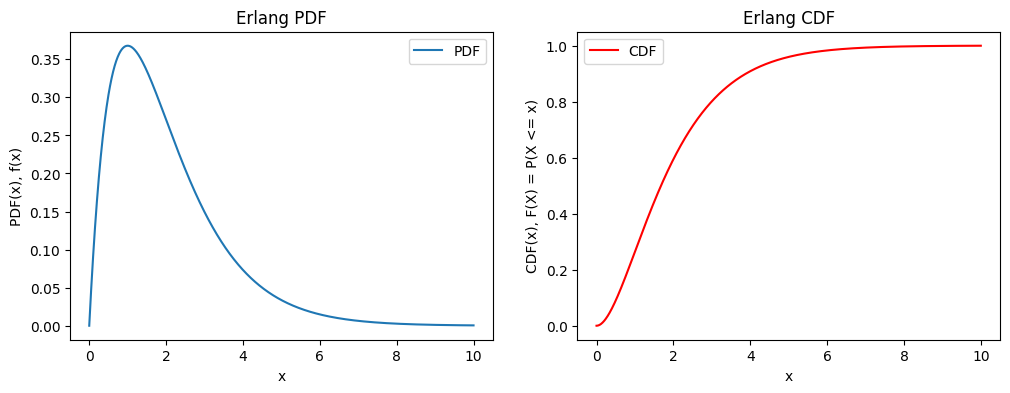

#---------------------------------------------#
Expected Value: 2.0000
Variance: 2.0000
#---------------------------------------------#
f(x = 2) = 0.2707
P(X > 2) = 0.4060
P(X >= 2) = 0.6767
P(X < 2) = 0.5940
P(X <= 2) = 0.5940


In [141]:
# Erlang Distribution (special case of Gamma)
a = 2  # Shape parameter
print(f"Erlang Distribution: a = {a} (shape)")
get_erlang_prob = plot_continuous_rv(erlang, (a,), 'Erlang', (0, 5*a))
get_erlang_prob(2)

---
#### **The relation of Erlang vs. Exponential**


If $X_1, X_2, ..., X_k$ are independent and identically distributed exponential random variables with rate parameter $\lambda$, then the random variable

  $Y = X_1 + X_2 + ... + X_k$

has an Erlang distribution with shape parameter $k$ and rate parameter $\lambda$.

**In a more compact notation:**

$Y = \sum_{i=1}^{k} X_i  \sim Erlang(k, \lambda)$

where $X_i \sim Exp(\lambda)$


**Explanation:**

* Each $X_i$ represents the time until an event occurs in a Poisson process.
* The sum $Y$ represents the total time it takes for *k* events to occur.

This formulation highlights the fact that the Erlang distribution is essentially built up from a series of exponential distributions. It's a helpful way to understand its properties and applications, especially in areas like queuing theory and reliability analysis.


---
### **Gamma**
**Gamma Distribution**

**1. Name:** Gamma Distribution

**2. Key Concept:**
  * The Gamma distribution is a versatile continuous probability distribution that is used to model a wide range of phenomena, including waiting times, survival times, and the sizes of various quantities.
  * It is a generalization of the exponential distribution and the chi-square distribution.
  * The Gamma distribution is characterized by two parameters: a shape parameter and a rate parameter (or a scale parameter, depending on the parameterization).

**3. Parameters:**
  *  $\alpha$ (alpha): Shape parameter (a positive real number).
  *  $\beta$ (beta): Rate parameter (a positive real number).
    * Alternatively, you can use the scale parameter $\theta$ (theta), which is equal to $1/\beta$.

**4. Domain of X:** $[0, \infty)$
   * X can take any non-negative value.

**5. PDF:**
   * $f(x; \alpha, \beta) = \frac{\beta^\alpha x^{\alpha - 1} e^{-\beta x}}{\Gamma(\alpha)}$ for $x \ge 0$
    * where $\Gamma(\alpha)$ is the gamma function.

**6. CDF:**
  * The CDF of the Gamma distribution doesn't have a simple closed form. It can be expressed using the incomplete gamma function.

**7. Expected Value:**
   *  $E(X) = \frac{\alpha}{\beta} = \alpha \cdot \theta$

**8. Variance:**
   *  $Var(X) = \frac{\alpha}{\beta^2} = \alpha \cdot \theta^2$


**Example Applications:**

* **Reliability Analysis:** Modeling the time to failure of a system.
* **Queuing Theory:** Modeling the waiting time for a customer in a queue.
* **Finance:** Modeling the size of insurance claims or the time until a loan defaults.
* **Meteorology:** Modeling rainfall amounts.

**Relationship to Other Distributions:**

* **Exponential Distribution:** When $\alpha = 1$, the Gamma distribution becomes the exponential distribution.
* **Chi-Square Distribution:** The chi-square distribution is a special case of the Gamma distribution where $\alpha = df/2$ (where *df* is the degrees of freedom) and $\beta = 1/2$.
* **Erlang Distribution:** The Erlang distribution is a special case of the Gamma distribution where the shape parameter $\alpha$ is an integer.
---


Gamma Distribution: a = 2 (shape), scale = 1


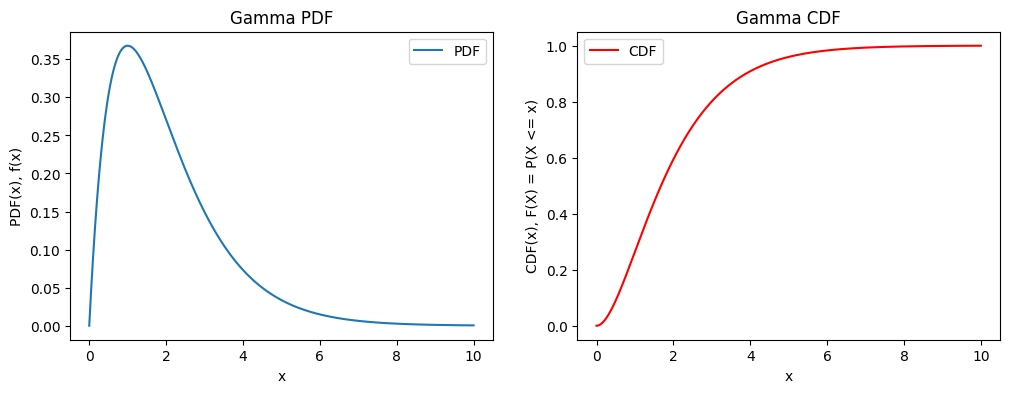

#---------------------------------------------#
Expected Value: 2.0000
Variance: 2.0000
#---------------------------------------------#
f(x = 2) = 0.2707
P(X > 2) = 0.4060
P(X >= 2) = 0.6767
P(X < 2) = 0.5940
P(X <= 2) = 0.5940


In [142]:
# Gamma Distribution
a = 2  # Shape parameter
scale = 1  # Scale parameter
print(f"Gamma Distribution: a = {a} (shape), scale = {scale}")
get_gamma_prob = plot_continuous_rv(gamma, (a, 0, scale), 'Gamma', (0, 5*a*scale))
get_gamma_prob(2)

---
### **Beta**
**Beta Distribution**

**1. Name:** Beta Distribution

**2. Key Concept:**
   * The Beta distribution is a continuous probability distribution defined on the interval [0, 1].
  * It's commonly used to model random variables that represent probabilities or proportions.
  * The shape of the Beta distribution is extremely flexible, making it suitable for modeling a wide variety of data.

**3. Parameters:**
  * $\alpha$ (alpha):  Shape parameter (a positive real number).
  * $\beta$ (beta): Shape parameter (a positive real number).

**4. Domain of X:** [0, 1]
  * X is typically a probability or proportion, so it falls between 0 and 1.

**5. PDF:**
  * $f(x; \alpha, \beta) = \frac{x^{\alpha - 1} (1 - x)^{\beta - 1}}{B(\alpha, \beta)}$ for $0 \le x \le 1$
       * where $B(\alpha, \beta)$ is the beta function, which ensures that the total probability integrates to 1.

**6. CDF:**
  * The CDF of the Beta distribution doesn't have a simple closed form, but it can be expressed using the regularized incomplete beta function.

**7. Expected Value:**
  * $E(X) = \frac{\alpha}{\alpha + \beta}$

**8. Variance:**
  * $Var(X) = \frac{\alpha \beta}{(\alpha + \beta)^2 (\alpha + \beta + 1)}$


**Example Applications:**

* **Bayesian Statistics:** The Beta distribution is often used as a prior distribution for probabilities in Bayesian inference.
* **Modeling Proportions:**  It can model the proportion of defective items in a batch, the percentage of time a machine is operational, or the probability of success in a Bernoulli trial.
* **Order Statistics:** The Beta distribution arises in the distribution of order statistics (e.g., the distribution of the kth smallest value in a sample).

**Flexibility of the Beta Distribution:**

By varying the values of $\alpha$ and $\beta$, the Beta distribution can take on a wide range of shapes:

* **Uniform:** When $\alpha = 1$ and $\beta = 1$, it becomes the uniform distribution on [0, 1].
* **Symmetric:** When $\alpha = \beta$, it's symmetric around 0.5.
* **Skewed:**  It can be skewed left (when $\alpha > \beta$) or skewed right (when $\alpha < \beta$).
* **U-shaped:** For certain values of $\alpha$ and $\beta$ less than 1, it can be U-shaped.

This flexibility makes the Beta distribution a powerful tool for modeling various types of data.

---

Beta Distribution: a = 2, b = 5


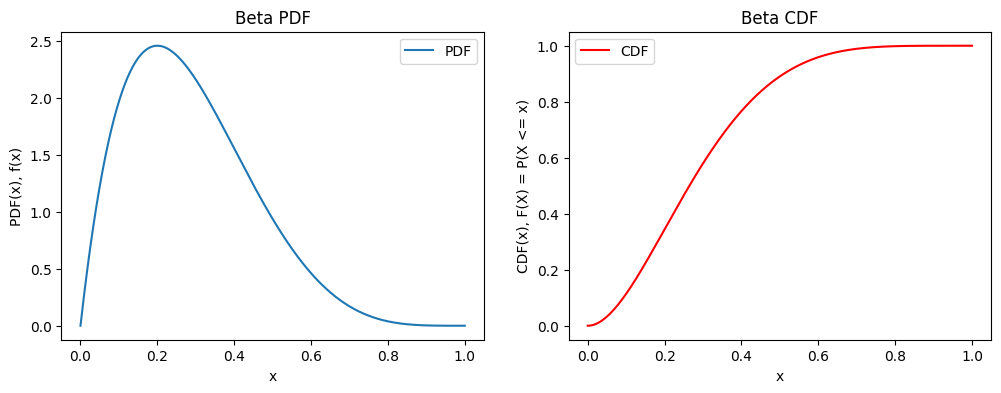

#---------------------------------------------#
Expected Value: 0.2857
Variance: 0.0255
#---------------------------------------------#
f(x = 0.5) = 0.9375
P(X > 0.5) = 0.1094
P(X >= 0.5) = 1.0469
P(X < 0.5) = 0.8906
P(X <= 0.5) = 0.8906


In [143]:
# Beta Distribution
a = 2
b = 5
print(f"Beta Distribution: a = {a}, b = {b}")
get_beta_prob = plot_continuous_rv(beta, (a, b), 'Beta', (0, 1))
get_beta_prob(0.5)

---
### **Log-normal**
**Log-normal Distribution**

**1. Name:** Log-normal Distribution

**2. Key Concept:**
   * A continuous probability distribution where the logarithm of the random variable is normally distributed.
   *  Often used to model variables that are skewed to the right, such as income levels, stock prices, or the size of things in nature (like raindrops or trees).

**3. Parameters:**
   * $\mu$ (mu): The mean of the underlying normal distribution (the logarithm of the variable).
   * $\sigma$ (sigma): The standard deviation of the underlying normal distribution.

**4. Domain of X:** $(0, \infty)$
   * X can take any positive value.

**5. PDF:**
   * $f(x; \mu, \sigma) = \frac{1}{x \sigma \sqrt{2\pi}} e^{-\frac{(\ln(x) - \mu)^2}{2\sigma^2}}$ for $x > 0$

**6. CDF:**
   * The CDF of the log-normal distribution doesn't have a simple closed form, but it can be expressed in terms of the standard normal CDF ($\Phi$):

* $F(x; \mu, \sigma) = \Phi(\frac{\ln(x) - \mu}{\sigma})$

**7. Expected Value:**
  * $E(X) = e^{\mu + \frac{\sigma^2}{2}}$

**8. Variance:**
  * $Var(X) = (e^{\sigma^2} -1)  e^{2\mu + \sigma^2}$

**Example Applications:**

* **Finance:** Modeling stock prices, asset returns, and income distributions.
* **Biology:** Modeling the size of organisms, the concentration of substances in the body, or the length of survival times.
* **Engineering:** Modeling the time to failure of components or systems.
* **Environmental Science:** Modeling the concentration of pollutants in the air or water.

**Why Log-normal?**

Many real-world phenomena exhibit multiplicative growth rather than additive growth.  For example, stock prices tend to grow by a certain percentage rather than by a fixed amount. The log-normal distribution is well-suited for modeling such phenomena because taking the logarithm transforms multiplicative growth into additive growth, which is what the normal distribution models.

**Key Properties:**

* **Skewness:** The log-normal distribution is always skewed to the right.
* **Relationship to Normal Distribution:** If $Y$ has a normal distribution, then $X = e^Y$ has a log-normal distribution.
---

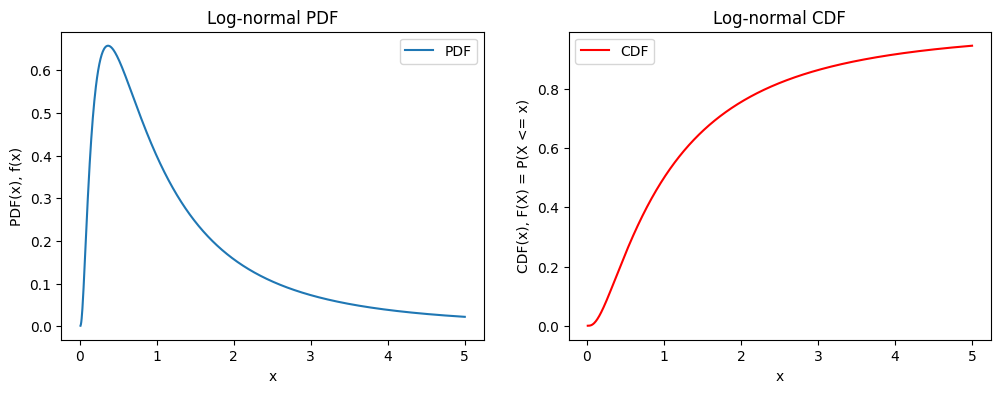

#---------------------------------------------#
Expected Value: 1.6487
Variance: 4.6708
#---------------------------------------------#
f(x = 1) = 0.3989
P(X > 1) = 0.5000
P(X >= 1) = 0.8989
P(X < 1) = 0.5000
P(X <= 1) = 0.5000


In [144]:
# Log-normal Distribution
s = 1  # Shape parameter
loc = 0  # Location parameter
scale = 1  # Scale parameter
get_lognorm_prob = plot_continuous_rv(lognorm, (s, loc, scale), 'Log-normal', (0.01, 5))
get_lognorm_prob(1)

---
### **Logistic**

**Logistic Distribution**

**1. Name:** Logistic Distribution

**2. Key Concept:**
   * The Logistic distribution is a continuous probability distribution that is often used to model growth processes and phenomena with a natural "S-shaped" curve.
   * It resembles the normal distribution in shape but has heavier tails.
   * It's commonly used in logistic regression, a statistical method for predicting binary outcomes.

**3. Parameters:**
   * $\mu$ (mu):  The location parameter, which determines the center of the distribution.
   * $s$ (scale): The scale parameter, which determines the spread of the distribution.

**4. Domain of X:** $(-\infty, \infty)$
   * X can take any real value.

**5. PDF:**
   * $f(x; \mu, s) = \frac{e^{-(x-\mu)/s}}{s(1 + e^{-(x-\mu)/s})^2}$

**6. CDF:**
   * $F(x; \mu, s) = \frac{1}{1 + e^{-(x-\mu)/s}}$

**7. Expected Value:**
   * $E(X) = \mu$

**8. Variance:**
   * $Var(X) = \frac{\pi^2 s^2}{3}$

**Example Applications:**

* **Logistic Regression:** Predicting the probability of a binary outcome (e.g., whether a customer will purchase a product, whether a patient will develop a disease).
* **Growth Models:** Modeling population growth, the spread of epidemics, or the adoption of new technologies.
* **Finance:** Modeling credit risk or the probability of default on a loan.
* **Image Processing:**  Used in image segmentation and classification.

**Key Properties:**

* **Symmetry:** The Logistic distribution is symmetric around its mean ($\mu$).
* **Heavier Tails:** It has heavier tails than the normal distribution, meaning that extreme values are more likely.
* **Cumulative Distribution Function:** The CDF of the Logistic distribution has a simple closed form, which makes it convenient for calculations.

**Relationship to the Standard Logistic Distribution:**

When $\mu = 0$ and $s = 1$, the Logistic distribution becomes the **Standard Logistic Distribution**.  Any Logistic distribution can be standardized using the transformation:

  $Z = \frac{X - \mu}{s}$

where $Z$ follows the standard logistic distribution.

---

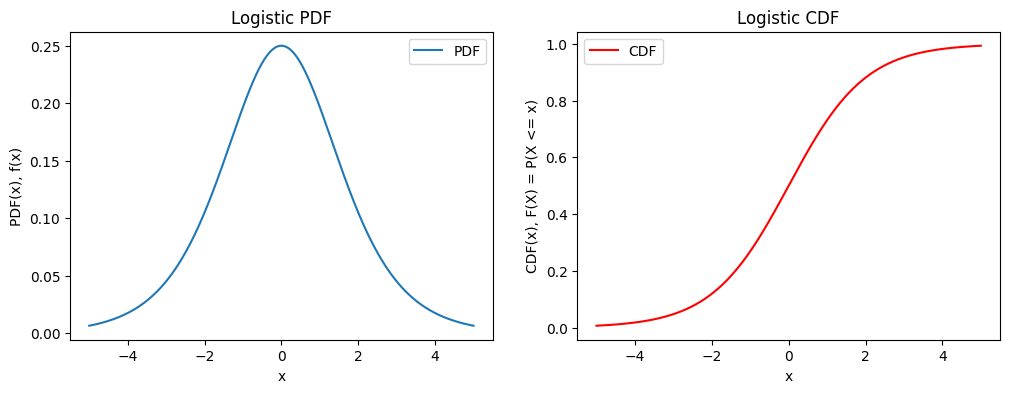

#---------------------------------------------#
Expected Value: 0.0000
Variance: 3.2899
#---------------------------------------------#
f(x = 0) = 0.2500
P(X > 0) = 0.5000
P(X >= 0) = 0.7500
P(X < 0) = 0.5000
P(X <= 0) = 0.5000


In [145]:
# Logistic Distribution
loc = 0  # Location parameter
scale = 1  # Scale parameter
get_logistic_prob = plot_continuous_rv(logistic, (loc, scale), 'Logistic', (-5, 5))
get_logistic_prob(0)

# Conclusion

This notebook has provided a comprehensive overview of various probability distributions, both discrete and continuous. We explored their key concepts, parameters, probability functions, expected values, variances, and real-world applications.

**Key Takeaways:**

* Probability distributions are essential tools for modeling random phenomena, making informed decisions, analyzing data, and performing hypothesis testing.
* Discrete distributions, such as the Bernoulli, Binomial, Geometric, and Poisson, are used to model events with countable outcomes.
* Continuous distributions, such as the Uniform, Exponential, Normal, and Gamma, are used to model events with continuous outcomes.
* Understanding the properties of different distributions is crucial for selecting the appropriate distribution for a given problem.
* Visualizations of distributions, like the PMF/PDF and CDF plots, provide valuable insights into their behavior.
* Approximations, like the Poisson approximation to the binomial and the normal approximation to the binomial, can simplify calculations in certain scenarios.

By studying probability distributions, we gain a deeper understanding of randomness and uncertainty, which is fundamental in various fields, including statistics, data science, and machine learning. This notebook serves as a valuable resource for exploring and applying these distributions in practical settings.